In [35]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l
# 造出来有噪声的数据
def synthetic_data(w,b,num_examples):
    # 生成 y = Xw + b + 噪声
    X = torch.normal(0,1,(num_examples,len(w))) # 生成均值为0，方差为1的随机数，有num_examples个样本，有len(w)个特征
    y = torch.matmul(X,w) + b # torch.matmul(X,w)就是矩阵乘向量
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2.,-3.,4.])
ture_b = 4.2
features,labels = synthetic_data(true_w,ture_b,1000)

In [36]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 0.0698, -0.1794, -1.4208]) 
label: tensor([-0.7989])


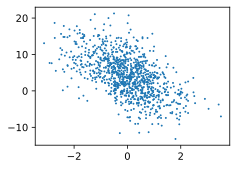

In [37]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1);

In [38]:
#读懂下一个cell代码所需要的前置知识
tmp = list(range(0, 10, 2))
print(tmp) # 三个参数的range
random.shuffle(tmp)# 洗牌算法
print(tmp)

# todo yield关键字的理解


[0, 2, 4, 6, 8]
[2, 4, 6, 8, 0]


In [39]:
# 每次从样本当中小批量，随机地挑出一部分样本
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 怎么样做到随机读取样本呢？ 打乱一下顺序即可
    random.shuffle(indices) #random模块的洗牌算法
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)]) #取切片，但是最后一下子害怕越界了，所以加了min函数
        yield features[batch_indices],labels[batch_indices]

batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.3551, -1.2844, -0.8400],
        [ 1.0153, -1.3996,  0.8812],
        [-1.1678, -0.3624, -0.2440],
        [ 0.1134,  2.0248,  0.5627],
        [-0.5500,  0.3114, -0.6253],
        [-0.8708, -0.1372,  1.0517],
        [-0.1199,  0.5830, -0.3328],
        [ 0.8395,  0.6899,  1.0952],
        [-0.8012,  0.1381,  0.3223],
        [ 1.8278, -0.1702, -1.4683]]) 
 tensor([[ 5.4089],
        [13.9609],
        [ 1.9623],
        [ 0.6036],
        [-0.3359],
        [ 7.0821],
        [ 0.8807],
        [ 8.1882],
        [ 3.4639],
        [ 2.5093]])


In [40]:
# 初始化模型参数
w = torch.normal(0,0.01,size=(3,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [41]:
# 定义模型
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w) + b # matmul:矩阵*向量

In [42]:
# 定义损失函数
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2 #损失函数公式

In [43]:
# 优化算法
def sgd(params,lr,batch_size): # params是一个list里面都是参数
    """
        小批量梯度下降
        with 语句用于异常处理，封装了 try…except…finally 编码范式
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size # 梯度下降算法
            param.grad.zero_()

In [45]:
# 训练过程
lr = 0.03 # learning rate
num_epochs = 3 # epoch数目
net = linreg # 设置函数为线性回归函数
loss = squared_loss # 损失函数

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y) # x 和 y的小批量损失
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss0.000049
epoch2,loss0.000049
epoch3,loss0.000049
